## Independent Data Exploration

This is the independent exploration project for Data 8. Please refer to Piazza and the Policies page for details on the project. Enter all of your code cells here for submission! You can either use this notebook directly or add the contents of this notebook to your own project notebook named `exploration.ipynb`. The following cell is required to submit.

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('exploration.ok')
_ = ok.auth(inline=True)

Assignment: Independent Data Exploration
OK, version v1.12.5

Successfully logged in as jessicahsiao@berkeley.edu


1. Choose and describe a data set that includes at least two tables, some quantitative variable, and some categorical variable.
2. Visualize some quantitative variable(s) of the data in a way that summarizes the data effectively and write a short observational description.
3. Visualize some categorical variable(s) of the data in a way that summarizes the data effectively and write a short observational description.
4. Summarize some aspect of the data in a table that involves grouping or pivoting and write a short observational description.
5. Summarize some aspect of the data in a table that involves joining the two tables and write a short observational description.
6. State a hypothesis related to the data and the corresponding null hypothesis.
7. Perform a statistical test for the hypothesis and write a short conclusion.
8. Describe a prediction problem related to the data.
9. Apply a prediction technique to the problem and briefly justify your choice of approach.
10. Evaluate the prediction technique quantitatively and write a short conclusion.

## 1. Independent Data Exploration


In [41]:
salaries_by_college = Table.read_table("salaries-by-college-type.csv").select(np.arange(4))
salaries_by_region = Table.read_table("salaries-by-region.csv").select(np.arange(4))
joined = salaries_by_college.join("School Name", salaries_by_region, "School Name").select(np.arange(5))

starting = joined.column(2)
starting = [s.replace('$', '') for s in starting]
mid = joined.column(3)
mid = [s.replace('$', '') for s in mid]

salaries = Table().with_columns('School Name', joined.column(0), 'School Type', joined.column(1), 
                                              'Region', joined.column(4), 'Starting Median Salary', starting, 
                                              'Mid-Career Median Salary', mid)
salaries = salaries.set_format('Starting Median Salary', NumberFormatter)
salaries = salaries.set_format('Mid-Career Median Salary', NumberFormatter)

salaries_by_college.show(3)
salaries_by_region.show(3)

School Name,School Type,Starting Median Salary,Mid-Career Median Salary
Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00"
California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00"
Harvey Mudd College,Engineering,"$71,800.00","$122,000.00"


School Name,Region,Starting Median Salary,Mid-Career Median Salary
Stanford University,California,"$70,400.00","$129,000.00"
California Institute of Technology (CIT),California,"$75,500.00","$123,000.00"
Harvey Mudd College,California,"$71,800.00","$122,000.00"


### 1. Dataset
The table below, **salaries**, contains the starting and mid-career median salaries for 268 schools in the United States, and classifies each school by school type and region. This table was formed by joining two datasets, one with median salaries by school type and one with median salaries by region. (Data source: Payscale, via Kaggle)

In [84]:
# Add your data exploration code here.
salaries

School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary
Amherst College,Liberal Arts,Northeastern,"54,500.00","107,000.00"
Appalachian State University,State,Southern,"40,400.00","69,100.00"
Arizona State University (ASU),Party,Western,"47,400.00","84,100.00"
Arizona State University (ASU),State,Western,"47,400.00","84,100.00"
Arkansas State University (ASU),State,Southern,"38,700.00","63,300.00"
Auburn University,State,Southern,"45,400.00","84,700.00"
Austin Peay State University,State,Southern,"37,700.00","59,200.00"
Ball State University (BSU),State,Midwestern,"39,100.00","64,500.00"
Bates College,Liberal Arts,Northeastern,"47,300.00","96,500.00"
Binghamton University,State,Northeastern,"53,600.00","95,900.00"


### 2. Quantitative Visualization
We can visualize the relationship between starting median salary and mid-career median salary through a scatter plot. The scatter plot below shows a strong positive linear relationship between starting and mid-career median salaries: as starting median salaries increase, so does mid-career median salaries. 

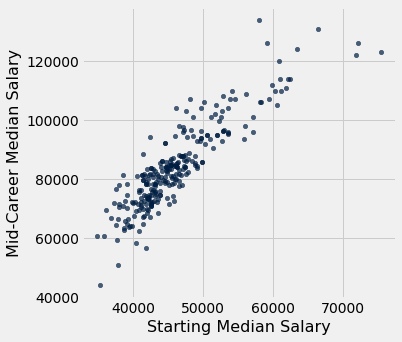

In [87]:
salaries.scatter("Starting Median Salary", "Mid-Career Median Salary")

### 3. Categorical Visualization.
We can visualize the distribution of schools by type and region. We see that the number of Ivy League schools is the smallest, while most schools are State schools. California has the fewest schools, while the Northeast contains the most schools.

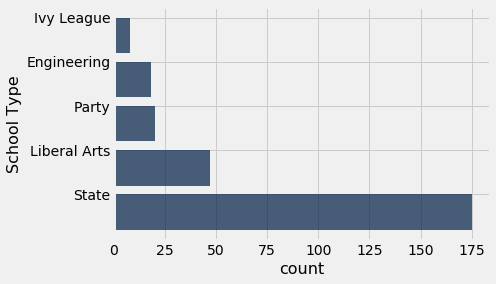

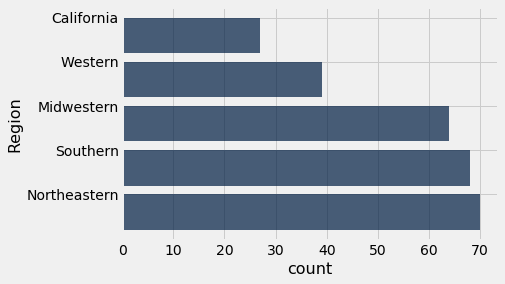

In [88]:
salaries.group('School Type').sort('count').barh('School Type')
salaries.group('Region').sort('count').barh('Region')

### 4. Grouping Summary
We can find the average starting and mid-career median salaries for each school type by grouping. After sorting the salaries by descending order, we see that both the average starting and mid-career median salaries for Ivy League schools are the highest, and the average salaries for State schools are the lowest. 

In [89]:
avg_salary_by_type = salaries.group('School Type', np.mean).drop(1,2).sort(1, descending=True)
avg_salary_by_type

School Type,Starting Median Salary mean,Mid-Career Median Salary mean
Ivy League,60475,120125
Engineering,59411.1,105128
Liberal Arts,45746.8,89378.7
Party,45715,84685
State,44126.3,78567.4


If we group by region instead to find the average median salaries and sort in descending order, we see that although California has the lowest number of schools in our sample, it has the highest average starting and mid-career salaries (WOOOOO GO CALIFORNIA!!).

In [90]:
avg_salary_by_region = salaries.group('Region', np.mean).drop(1,2).sort(1, descending=True)
avg_salary_by_region

Region,Starting Median Salary mean,Mid-Career Median Salary mean
California,50155.6,91633.3
Northeastern,49267.1,93518.6
Southern,44288.2,80302.9
Western,44151.3,78135.9
Midwestern,43801.6,77637.5


### 5. Joining Summary
Let's join the table with average starting and median salaries by region with a table with the number of schools per region. We see that though California has the least schools in the sample (27), it has the highest average starting and mid-career median salaries.

In [43]:
avg_salary_by_region.join('Region', region_count, 'Region')

Region,Starting Median Salary mean,Mid-Career Median Salary mean,count
California,50155.6,91633.3,27
Midwestern,43801.6,77637.5,64
Northeastern,49267.1,93518.6,70
Southern,44288.2,80302.9,68
Western,44151.3,78135.9,39


### 6. Hypotheses
It seems like the average starting median salary for California schools are higher, on average, compared to schools in the the other regions. Is this due to chance variation? Let's perform an experiment:

**Null Hypothesis:** The average starting median salary for California schools is like the average starting median salary for the same number of schools picked at random from the entire sample of 268 schools.

**Alternate Hypothesis:** The average starting median salary for California schools is higher than average. 

### 7. Testing

p = 0.0008


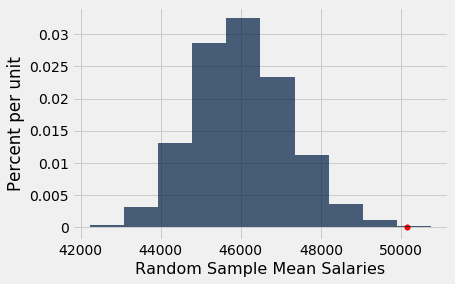

In [91]:
ca_avg_salary = 50155.6	

repetitions = 10000

means = make_array()

for i in np.arange(repetitions): 
    sample_mean = salaries.sample(27, with_replacement=False).column('Starting Median Salary').mean()
    means = np.append(means, sample_mean)
    
p_value = np.count_nonzero(means >= ca_avg_salary) / repetitions
print('p =', p_value)
results = Table().with_column('Random Sample Mean Salaries', means)
results.hist()
plots.scatter(ca_avg_salary, 0, color='red', s=30)

We see that the red dot representing the average starting median salary for California is very high compared to the distribution of random sample means. Our empirical p-value for the sample, 0.0008, is much lower than the conventional 5% cutoff value as well as a 1% cutoff, so we can conclude that the result is highly statistically significant and reject the null hypothesis. California's average starting median salary is indeed higher than the average salaries of schools in other regions. 

### 8. A Prediction Problem
Is your starting median salary a sure indicator of what you'll be earning midway into your career? For instance, if I start with a fairly low salary, does that mean my mid-career salary will be lower than the mid-career salaries of people who started with a higher starting salary (so it follows a linear relationship)? We want to predict mid-career median salaries from starting median salaries. Let's use the least squares regression model and see if this predictor works.

### 9. Prediction (using regression)
We'll use the least squares regression method to predict mid-career median salary from starting median salary, since our scatter plot from earlier (reproduced below) shows a positive linear relationship. The least squares regression model seems like it will work well for this data, since starting and mid-career median salaries appear to have a linear relationship.

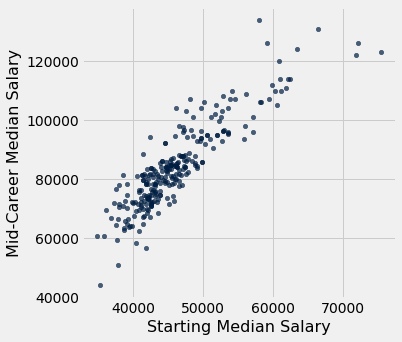

In [92]:
salaries.scatter('Starting Median Salary', 'Mid-Career Median Salary')

Let's define a few functions that will make applying the regression method easier.

In [93]:
# Returns array of standardized values for input array of numbers, arr.
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

# Takes in a table and two column labels, and returns the correlation coefficient for those two columns.
def correlation(tbl, x, y):
    return np.mean(standard_units(tbl.column(x)) * standard_units(tbl.column(y)))

# Returns the slope of regression line for two variables. Takes in a table and two column labels.
def slope(tbl, x, y):
    r = correlation(tbl, x, y)
    sd_y = np.std(tbl.column(y))
    sd_x = np.std(tbl.column(x))
    return r * sd_y / sd_x

# Returns y-intercept of regression line for two variables. Takes in a table and two column labels.
def intercept(tbl, x, y):
    m = slope(tbl, x, y)
    avg_y = np.mean(tbl.column(y))
    avg_x = np.mean(tbl.column(x))
    return avg_y - (m * avg_x)
    

We calculate the correlation coefficient, slope, and intercept of the regression line for mid-career median salary on starting median salary and obtain the following equation:

In [94]:
salaries_r = correlation(salaries, 'Starting Median Salary', 'Mid-Career Median Salary')
salaries_slope = slope(salaries, 'Starting Median Salary', 'Mid-Career Median Salary')
salaries_intercept = intercept(salaries, 'Starting Median Salary', 'Mid-Career Median Salary')

print('predicted mid-career median salary = ', salaries_slope, ' * starting median salary + ', salaries_intercept)

predicted mid-career median salary =  1.99898802086  * starting median salary +  -8096.31522762


We can plot the predicted mid-career and actual mid-career salaries.

Starting Median Salary,Mid-Career Median Salary,Predicted Mid-Career Median Salary
"54,500.00","107,000.00",100849
"40,400.00","69,100.00",72662.8
"47,400.00","84,100.00",86655.7


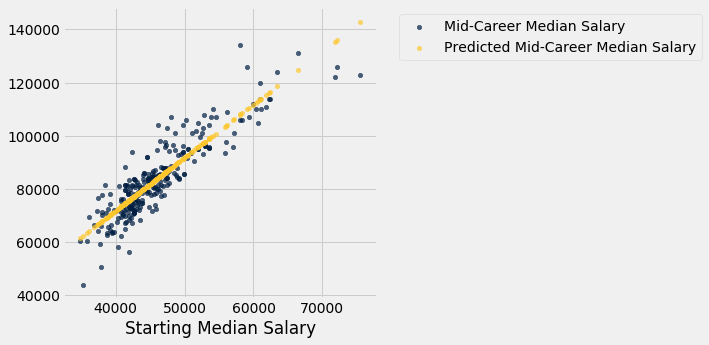

In [63]:
salaries_with_predictions = salaries.with_column('Predicted Mid-Career Median Salary', 
                                                salaries_slope * salaries.column('Starting Median Salary') 
                                                 + salaries_intercept).drop(0,1,2)
salaries_with_predictions.show(3)
salaries_with_predictions.scatter('Starting Median Salary')



### 10. Evaluate Prediction Technique
We can predict the mid-career median salary from starting median salary for Wheaton College, which is not in our original sample of 268 schools. To evaluate how good our predictor is, we first predict Wheaton's mid-career median salary using our original sample, then bootstrap our sample many times to obtain a confidence interval of predictions for the given starting median salary. If Wheaton's actual mid-career median salary is captured in our confidence interval of predictions, we can be fairly confident that our predictor is good.

According to Payscale, Wheaton's starting median salary is $49,600.

In [68]:
wheaton_start_salary = 49600
wheaton_predicted_mid_salary = salaries_slope * wheaton_start_salary + salaries_intercept
wheaton_predicted_mid_salary

91053.49060702014

We'll bootstrap our original sample using 5000 repetitions and visualize the distribution of predictions using a histogram.

Regression prediction for original sample: 91053.490607
Approximate 95%-confidence interval: 90020.0229619 92229.6739709


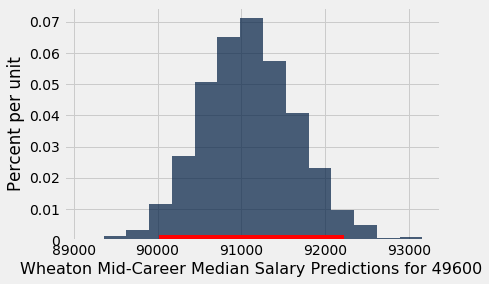

In [74]:
# returns regression prediction value of y given x from a table. 
# Takes in a table, two column labels, and a given value of x.
def prediction(tbl, x, y, given_x):
    a = slope(tbl, x, y)
    b = intercept(tbl, x, y)
    return a * given_x  + b

predictions = make_array()

for i in np.arange(5000):
    bootstrap = salaries.sample()
    boostrap_prediction = prediction(bootstrap, 'Starting Median Salary', 'Mid-Career Median Salary', wheaton_start_salary)
    predictions = np.append(predictions, boostrap_prediction)
    
lower_bound = percentile(2.5, predictions)
upper_bound = percentile(97.5, predictions)

# Display bootstrap predictions and interval. Code sample taken from chapter 14.3 of Inferential Thinking textbook.
Table().with_column('Prediction', predictions).hist(bins=15)
plots.xlabel('Wheaton Mid-Career Median Salary Predictions for '+str(wheaton_start_salary))
plots.plot(make_array(lower_bound, upper_bound), make_array(0, 0), color='red', lw=10);
print('Regression prediction for original sample:', wheaton_predicted_mid_salary)
print('Approximate 95%-confidence interval:', lower_bound, upper_bound)

    

The histogram above shows the empirical distribution of bootstrap predictions for mid-career median salary based on our given starting median salary for Wheaton College (49,600). We can see that the empirical distribution is roughly normal.

By taking the middle 95% of predictions, we get a 95% confidence interval ranging from about 90,020 to 92,230. Our original predicted mid-career median salary of 91,053 is just about in the center of this interval. 

How accurate was our predictor? Payscale's mid-career median salary for Wheaton College is 96,600, which is outside of our 95% confidence interval. It seems that the regression predictions are lower than they should be, so maybe the regression model isn't the best predictor for this set of data. Let's check the residuals.

Starting Median Salary,Mid-Career Median Salary,Predicted Mid-Career Median Salary,Residual
"54,500.00","107,000.00",100849,-6151.47
"40,400.00","69,100.00",72662.8,3562.8
"47,400.00","84,100.00",86655.7,2555.72


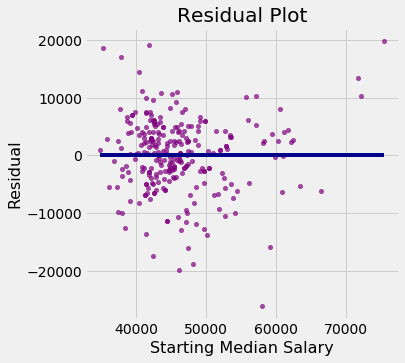

In [82]:
residuals = salaries_with_predictions.column(2) - salaries_with_predictions.column(1)
salaries_with_residuals = salaries_with_predictions.with_column('Residual', residuals)
salaries_with_residuals.show(3)
salaries_with_residuals.scatter('Starting Median Salary', 'Residual', color='purple')
start_salaries = salaries.column('Starting Median Salary')
xlims = make_array(min(start_salaries), max(start_salaries))
plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
plots.title('Residual Plot')

We see that the residuals aren't entirely randomly scattered about the horizontal line at 0. They tend to cluster more to the left for lower starting median salaries. There are some residuals that are quite far from the horizontal line at 0. From these results, we can probably say that starting median salary isn't a definite predictor of mid-career salary -- it's possible earn much more in the future than when you first begin your career, or not experience much salary growth at all. We can conclude that there's definitely more factors affecting mid-career salaries than just starting median salary.

## 2. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>